# Incluindo bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Tratamento dos Dados

In [2]:
data=pd.read_csv('diabetes_prediction_dataset.csv')
data = pd.DataFrame(data._data)
data['diabetes']= data.diabetes
data['gender']=data['gender'].replace(['Female',"Male","Other"],[0,1,2] )
data['smoking_history']=data['smoking_history'].replace(['No Info','never', 'former', 'not current', 'current', 'ever'],[0,1,2,3,4,5] )
x=data.drop(columns=['diabetes'])
data.head()
y= data.diabetes

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,1,27.32,5.7,158,0
3,0,36.0,0,0,4,23.45,5.0,155,0
4,1,76.0,1,1,4,20.14,4.8,155,0


# Divisão dos Dados

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Plot Cmeans

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def mostrar_matriz_confusao(lista_de_matrizes, title):
    soma_matrizes = np.sum(lista_de_matrizes, axis=0)
    media_matrizes = soma_matrizes / len(lista_de_matrizes)

    fig, ax = plt.subplots()
    im = ax.imshow(media_matrizes, cmap=plt.cm.coolwarm)
    fig.colorbar(im)

    classes = ['SIM', 'NÃO']
    tick_marks = np.arange(len(classes))

    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = media_matrizes.max() / 2
    for i in range(media_matrizes.shape[0]):
        for j in range(media_matrizes.shape[1]):
            ax.text(j, i, format(media_matrizes[i, j], '.2f'),
                    ha="center", va="center",
                    color="white" if media_matrizes[i, j] > thresh else "black")

    ax.set_xlabel('Classe Prevista')
    ax.set_ylabel('Classe Verdadeira')
    ax.set_title('Matriz de Confusão: ' + title)

    plt.show()

# Declarando Modelos

In [6]:
# KNN
x_train_knn, x_test_knn, y_train_knn, y_test_knn  = x_train, x_test, y_train, y_test

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train_knn, y_train_knn)

y_pred_knn = knn.predict(x_test_knn)


# DecisionTree
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

tree = DecisionTreeClassifier()



# Random forest
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rforest = RandomForestClassifier()

rforest.fit(x_train, y_train)

y_pred = rforest.predict(x_test)

# Executando treinamentos dos modelos com kfold=5

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

modelos = [knn, tree, rforest]

# Defina o número de folds
k = 5

# Inicialize as listas para armazenar as métricas de cada modelo
model_metrics = []
model_confusion_matrices = []

# Inicialize o objeto StratifiedKFold
kf = StratifiedKFold(n_splits=k)

# Normalizar os dados usando StandardScaler
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

# Itere sobre os folds
for train_index, test_index in kf.split(x_normalized, y):
    # Divida os dados em conjuntos de treinamento e teste
    x_train, x_test = x_normalized[train_index], x_normalized[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Inicialize as listas para armazenar as métricas de cada fold
    fold_metrics = []
    fold_confusion_matrices = []

    # Treine e avalie cada modelo
    for model in modelos:
        # Treine o modelo
        model.fit(x_train, y_train)

        # Faça previsões no conjunto de teste
        y_pred = model.predict(x_test)

        # Calcule as métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        # Calcule a matriz de confusão
        confusion = confusion_matrix(y_test, y_pred)

        # Armazene as métricas e a matriz de confusão deste modelo e fold
        fold_metrics.append((accuracy, precision, recall))
        fold_confusion_matrices.append(confusion)

    # Armazene as métricas e a matriz de confusão de todos os modelos deste fold
    model_metrics.append(fold_metrics)
    model_confusion_matrices.append(fold_confusion_matrices)

# Calcule as médias das métricas para cada modelo
model_means = np.mean(model_metrics, axis=0)

list_knn = [b[0] for b in model_metrics]
list_tree = [b[1] for b in model_metrics]
list_rforest = [b[2] for b in model_metrics]

matriz_knn = [b[0] for b in model_confusion_matrices]
matriz_tree = [b[1] for b in model_confusion_matrices]
matriz_rforest = [b[2] for b in model_confusion_matrices]


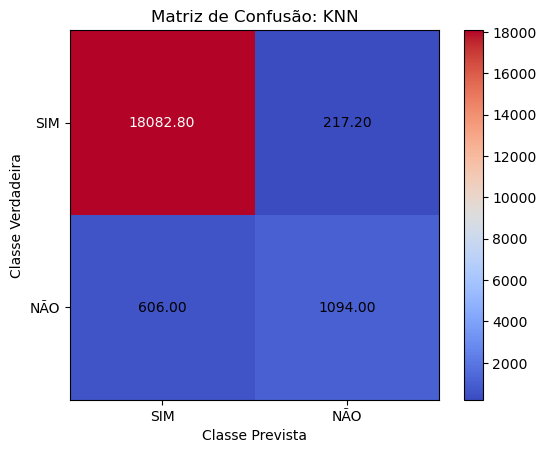

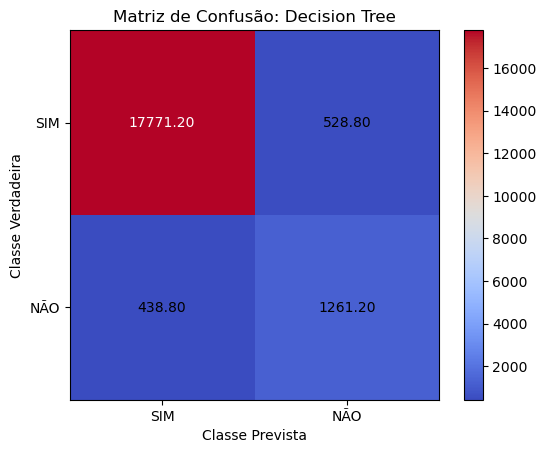

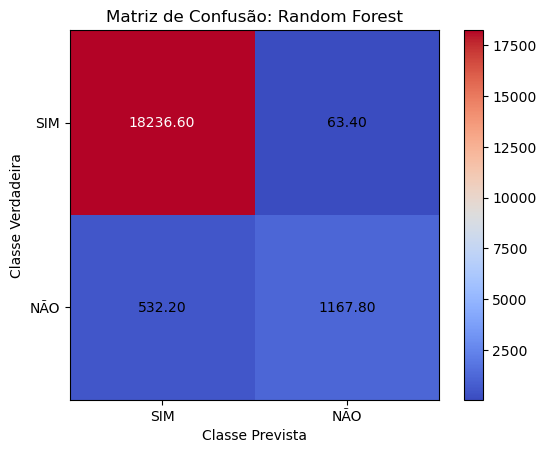

In [8]:
# Plotando matrizes de confusão referentes aos modelos
mostrar_matriz_confusao(matriz_knn,"KNN")
mostrar_matriz_confusao(matriz_tree,"Decision Tree")
mostrar_matriz_confusao(matriz_rforest,"Random Forest")


# Exibir as métricas para cada divisão da validação e a média de cada métrica para cada modelo

In [9]:
import matplotlib.pyplot as plt

# Função para exibir a matriz de confusão
def plot_confusion_matrix(confusion_matrix, classes):
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.brg)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    thresh = confusion_matrix.max() / 2
    for i, j in np.ndindex(confusion_matrix.shape):
        plt.text(j, i, confusion_matrix[i, j], horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")
    plt.xlabel('Classe Prevista')
    plt.ylabel('Classe Verdadeira')
    plt.title('Matriz de Confusão')

# Exibir as métricas para cada divisão da validação e a média de cada métrica para cada modelo
print("Modelo:", modelos[0])
for j, (accuracy, precision, recall) in enumerate(list_knn):
    print("Fold", j+1, "- Acurácia:", accuracy, "Precisão:", precision, "Recall:", recall)
print("Média - Acurácia:", model_means[0][0], "Precisão:", model_means[0][1], "Recall:", model_means[0][2], "\n\n\n\n")

print("Modelo:", modelos[1])
for j, (accuracy, precision, recall) in enumerate(list_tree):
    print("Fold", j+1, "- Acurácia:", accuracy, "Precisão:", precision, "Recall:", recall)
print("Média - Acurácia:", model_means[1][0], "Precisão:", model_means[1][1], "Recall:", model_means[1][2], "\n\n\n\n")

print("Modelo:", modelos[2])
for j, (accuracy, precision, recall) in enumerate(list_rforest):
    print("Fold", j+1, "- Acurácia:", accuracy, "Precisão:", precision, "Recall:", recall)
print("Média - Acurácia:", model_means[2][0], "Precisão:", model_means[2][1], "Recall:", model_means[2][2])


Modelo: KNeighborsClassifier(n_neighbors=3)
Fold 1 - Acurácia: 0.9594 Precisão: 0.8378995433789954 Recall: 0.6476470588235295
Fold 2 - Acurácia: 0.9591 Precisão: 0.8340909090909091 Recall: 0.6476470588235295
Fold 3 - Acurácia: 0.9589 Precisão: 0.8440438871473355 Recall: 0.6335294117647059
Fold 4 - Acurácia: 0.95975 Precisão: 0.8382464096749811 Recall: 0.6523529411764706
Fold 5 - Acurácia: 0.95705 Precisão: 0.817838246409675 Recall: 0.6364705882352941
Média - Acurácia: 0.95884 Precisão: 0.8344237991403792 Recall: 0.6435294117647059 




Modelo: DecisionTreeClassifier()
Fold 1 - Acurácia: 0.95295 Precisão: 0.7111853088480802 Recall: 0.7517647058823529
Fold 2 - Acurácia: 0.94985 Precisão: 0.6890938686923495 Recall: 0.7470588235294118
Fold 3 - Acurácia: 0.94945 Precisão: 0.6981023576768257 Recall: 0.7141176470588235
Fold 4 - Acurácia: 0.9538 Precisão: 0.7157953281423804 Recall: 0.7570588235294118
Fold 5 - Acurácia: 0.95205 Precisão: 0.7089678510998308 Recall: 0.7394117647058823
Média - Acu